In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
from torchvision import transforms,datasets
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
class Conv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0):
        super(Conv, self).__init__()
        # Definimos la convolución
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        # Usamos ReLU como función de activación
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, x):
        # Aplicamos la convolución y luego la activación ReLU
        x = self.conv(x)
        x = self.relu(x)
        return x
# Definición de la clase Conv para una capa convolucional personalizada con LRN
class ConvLRN(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ConvLRN, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.relu = nn.ReLU(inplace=True)
        self.lrn = nn.LocalResponseNorm(size=5, alpha=1e-4, beta=0.75, k=2.0)  # LRN

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.lrn(x)  # Aplicar LRN después de la activación
        return x
    
class ConvBN(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0):
        super(ConvBN, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)  # Batch Normalization
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x
        
class MaxPooling(nn.Module):
    def __init__(self,kernel_size=3,stride=2,padding=0):
        super(MaxPooling,self).__init__()
        self.maxpool=nn.MaxPool2d(kernel_size=kernel_size,stride=stride,padding=padding)
        
    def forward(self,x):
        x=self.maxpool(x)
        return x



In [22]:
class ConvNetE(nn.Module):
    def __init__(self):
        super(ConvNetE, self).__init__()
        self.layer1=Conv(kernel_size=3,stride=1,in_channels=3,out_channels=64,padding=1)
        self.layer2=Conv(kernel_size=3,stride=1,in_channels=64,out_channels=64,padding=1)
        
        self.maxpool1=MaxPooling(kernel_size=2, stride=2)
        
        self.layer3=Conv(kernel_size=3,stride=1,in_channels=64,out_channels=128,padding=1)
        self.layer4=Conv(kernel_size=3,stride=1,in_channels=128,out_channels=128,padding=1)
        
        
        self.maxpool2=MaxPooling(kernel_size=2, stride=2)
        
        self.layer5=Conv(kernel_size=3,stride=1,in_channels=128,out_channels=256,padding=1)
        self.layer6=Conv(kernel_size=3,stride=1,in_channels=256,out_channels=256,padding=1)
        self.layer7=Conv(kernel_size=3,stride=1,in_channels=256,out_channels=256,padding=1)
        self.layer8=Conv(kernel_size=3,stride=1,in_channels=256,out_channels=256,padding=1)
        
        
        self.maxpool3=MaxPooling(kernel_size=2, stride=2)
        
        
        self.layer9=Conv(kernel_size=3,stride=1,in_channels=256,out_channels=512,padding=1)
        self.layer10=Conv(kernel_size=3,stride=1,in_channels=512,out_channels=512,padding=1)
        self.layer11=Conv(kernel_size=3,stride=1,in_channels=512,out_channels=512,padding=1)
        self.layer12=Conv(kernel_size=3,stride=1,in_channels=512,out_channels=512,padding=1)
        
        self.maxpool4=MaxPooling(kernel_size=2, stride=2)
        
        
        self.layer13=Conv(kernel_size=3,stride=1,in_channels=512,out_channels=512,padding=1)
        self.layer14=Conv(kernel_size=3,stride=1,in_channels=512,out_channels=512,padding=1)
        self.layer15=Conv(kernel_size=3,stride=1,in_channels=512,out_channels=512,padding=1)
        self.layer16=Conv(kernel_size=3,stride=1,in_channels=512,out_channels=512,padding=1)
        
        
        self.maxpool5=MaxPooling(kernel_size=2, stride=2)
        
        self.fc1 = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(512 * 7 * 7, 4096),  # Ajusta según el tamaño que calcules
    nn.ReLU())

        self.fc2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc3= nn.Sequential(
            nn.Linear(4096, 2))
        
        self.softmax=nn.Softmax()
        
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.maxpool1(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.maxpool2(x)
        
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        x = self.layer8(x)
        
        x = self.maxpool3(x)
        
        x = self.layer9(x)
        x = self.layer10(x)
        x = self.layer11(x)
        x = self.layer12(x)
        
        x = self.maxpool4(x)
        
        x = self.layer13(x)
        x = self.layer14(x)
        x = self.layer15(x)
        x = self.layer16(x)
        
        x = self.maxpool5(x)



        # Imprimir el tamaño de la salida antes de aplanar
        print(x.size())

        x = x.reshape(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
       


        return x

In [21]:
import torch.optim as optim
# Model initialization
model = ConvNetE()

# Optimizer with weight decay (L2 regularization)
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, weight_decay=5e-4)


# Loss function
criterion = nn.CrossEntropyLoss()

In [23]:
# Rutas y transformaciones
data_dir = r'C:\Users\ASUS RYZEN 7\Documents\PROYECTOS\Computer vision\animas\animal'
batch_size = 16
normalize = transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
    )


# Transformaciones para entrenamiento y validación
transform = transforms.Compose([
    transforms.Resize((227, 227)),  # Redimensiona las imágenes
    transforms.ToTensor(),  # Convierte las imágenes a tensores
      # Normalización
      normalize,
])

# Cargar el dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Dividir en conjuntos de entrenamiento y validación
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


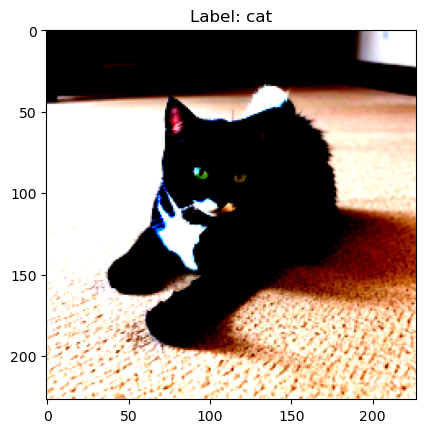

In [27]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, title=None):
    # No desnormalizamos la imagen ya que no hemos normalizado
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Transpone la imagen (C,H,W) a (H,W,C)
    if title is not None:
        plt.title(title)
    plt.show()

# Obtener un batch de datos
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Mostrar la primera imagen del batch
imshow(images[0], title=f'Label: {dataset.classes[labels[0]]}')


In [28]:
# Train the model
total_step = len(train_loader)

In [29]:
device = torch.device("cpu")


In [30]:
num_classes = 2
num_epochs = 10
batch_size = 16
learning_rate = 0.005

torch.manual_seed(42)
np.random.seed(42)
model = ConvNetE().to(device)

In [31]:
print(model)

ConvNetE(
  (layer1): Conv(
    (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (relu): ReLU(inplace=True)
  )
  (layer2): Conv(
    (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (relu): ReLU(inplace=True)
  )
  (maxpool1): MaxPooling(
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Conv(
    (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (relu): ReLU(inplace=True)
  )
  (layer4): Conv(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (relu): ReLU(inplace=True)
  )
  (maxpool2): MaxPooling(
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer5): Conv(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (relu): ReLU(inplace=True)
  )
  (layer6): Conv(
    (conv): C

In [38]:

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import seaborn as sns

from tqdm import tqdm
import torch

def train(model, dataloader, criterion, optimizer, num_epochs=1):
    model.train()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    train_losses = []
    train_accuracies = []
    all_labels = []
    all_preds = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        corrects = 0
        total = 0
        
        # Crear tqdm para el bucle de entrenamiento
        progress_bar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch")
        
        for i, (images, labels) in enumerate(progress_bar):
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass y optimización
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Actualizar loss y accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (predicted == labels).sum().item()
            
            # Guardar predicciones y etiquetas
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            # Cálculo de loss y accuracy hasta el batch actual
            current_loss = running_loss / (i + 1)
            current_accuracy = corrects / total
            
            # Actualizar barra de progreso con las métricas
            progress_bar.set_postfix(loss=current_loss, accuracy=current_accuracy)
        
        # Guardar métricas para el epoch actual
        train_losses.append(running_loss / len(dataloader))
        train_accuracies.append(corrects / total)
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]:.4f}")
    
    return train_losses, train_accuracies, all_labels, all_preds


In [39]:
train_losses, train_accuracies, all_labels, all_preds = train(model, train_loader, criterion, optimizer, num_epochs)

Epoch 1/10:   0%|          | 0/50 [00:00<?, ?batch/s]

torch.Size([16, 512, 7, 7])


Epoch 1/10:   2%|▏         | 1/50 [00:37<30:14, 37.04s/batch, accuracy=0.438, loss=0.694]

torch.Size([16, 512, 7, 7])


Epoch 1/10:   4%|▍         | 2/50 [01:07<26:39, 33.31s/batch, accuracy=0.5, loss=0.693]  

torch.Size([16, 512, 7, 7])


Epoch 1/10:   6%|▌         | 3/50 [01:36<24:31, 31.31s/batch, accuracy=0.521, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:   8%|▊         | 4/50 [02:05<23:10, 30.23s/batch, accuracy=0.547, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  10%|█         | 5/50 [02:33<22:03, 29.41s/batch, accuracy=0.525, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  12%|█▏        | 6/50 [03:01<21:10, 28.89s/batch, accuracy=0.5, loss=0.693]  

torch.Size([16, 512, 7, 7])


Epoch 1/10:  14%|█▍        | 7/50 [03:30<20:48, 29.03s/batch, accuracy=0.491, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  16%|█▌        | 8/50 [04:08<22:22, 31.97s/batch, accuracy=0.477, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  18%|█▊        | 9/50 [05:03<26:37, 38.98s/batch, accuracy=0.465, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  20%|██        | 10/50 [05:52<28:06, 42.16s/batch, accuracy=0.469, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  22%|██▏       | 11/50 [06:47<29:58, 46.11s/batch, accuracy=0.46, loss=0.693] 

torch.Size([16, 512, 7, 7])


Epoch 1/10:  24%|██▍       | 12/50 [07:30<28:41, 45.31s/batch, accuracy=0.458, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  26%|██▌       | 13/50 [08:19<28:32, 46.29s/batch, accuracy=0.462, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  28%|██▊       | 14/50 [08:51<25:14, 42.08s/batch, accuracy=0.46, loss=0.693] 

torch.Size([16, 512, 7, 7])


Epoch 1/10:  30%|███       | 15/50 [09:19<22:02, 37.79s/batch, accuracy=0.454, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  32%|███▏      | 16/50 [09:50<20:16, 35.79s/batch, accuracy=0.453, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  34%|███▍      | 17/50 [10:18<18:23, 33.45s/batch, accuracy=0.456, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  36%|███▌      | 18/50 [10:47<17:03, 31.97s/batch, accuracy=0.462, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  38%|███▊      | 19/50 [11:16<16:03, 31.08s/batch, accuracy=0.461, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  40%|████      | 20/50 [11:46<15:27, 30.92s/batch, accuracy=0.469, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  42%|████▏     | 21/50 [12:16<14:47, 30.59s/batch, accuracy=0.467, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  44%|████▍     | 22/50 [12:45<13:57, 29.92s/batch, accuracy=0.474, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  46%|████▌     | 23/50 [13:12<13:08, 29.19s/batch, accuracy=0.481, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  48%|████▊     | 24/50 [13:41<12:41, 29.28s/batch, accuracy=0.477, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  50%|█████     | 25/50 [14:12<12:20, 29.62s/batch, accuracy=0.485, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  52%|█████▏    | 26/50 [14:39<11:31, 28.80s/batch, accuracy=0.478, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  54%|█████▍    | 27/50 [15:07<10:58, 28.61s/batch, accuracy=0.479, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  56%|█████▌    | 28/50 [15:38<10:48, 29.46s/batch, accuracy=0.482, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  58%|█████▊    | 29/50 [16:06<10:07, 28.92s/batch, accuracy=0.489, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  60%|██████    | 30/50 [16:33<09:25, 28.29s/batch, accuracy=0.487, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  62%|██████▏   | 31/50 [17:02<09:02, 28.56s/batch, accuracy=0.484, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  64%|██████▍   | 32/50 [17:29<08:27, 28.19s/batch, accuracy=0.482, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  66%|██████▌   | 33/50 [18:02<08:21, 29.51s/batch, accuracy=0.489, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  68%|██████▊   | 34/50 [18:36<08:12, 30.75s/batch, accuracy=0.493, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  70%|███████   | 35/50 [19:06<07:40, 30.67s/batch, accuracy=0.489, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  72%|███████▏  | 36/50 [19:34<06:58, 29.92s/batch, accuracy=0.488, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  74%|███████▍  | 37/50 [20:03<06:24, 29.57s/batch, accuracy=0.488, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  76%|███████▌  | 38/50 [20:33<05:55, 29.60s/batch, accuracy=0.487, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  78%|███████▊  | 39/50 [21:01<05:22, 29.29s/batch, accuracy=0.492, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  80%|████████  | 40/50 [21:33<04:59, 29.92s/batch, accuracy=0.494, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  82%|████████▏ | 41/50 [22:01<04:26, 29.56s/batch, accuracy=0.495, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  84%|████████▍ | 42/50 [22:35<04:05, 30.65s/batch, accuracy=0.499, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  86%|████████▌ | 43/50 [23:07<03:38, 31.20s/batch, accuracy=0.501, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  88%|████████▊ | 44/50 [23:39<03:09, 31.53s/batch, accuracy=0.504, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  90%|█████████ | 45/50 [24:07<02:32, 30.42s/batch, accuracy=0.506, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  92%|█████████▏| 46/50 [24:36<02:00, 30.00s/batch, accuracy=0.505, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  94%|█████████▍| 47/50 [25:09<01:32, 30.70s/batch, accuracy=0.501, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  96%|█████████▌| 48/50 [25:39<01:01, 30.73s/batch, accuracy=0.496, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10:  98%|█████████▊| 49/50 [26:12<00:31, 31.45s/batch, accuracy=0.496, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 1/10: 100%|██████████| 50/50 [26:47<00:00, 32.16s/batch, accuracy=0.497, loss=0.693]


Epoch [1/10], Loss: 0.6932, Accuracy: 0.4975


Epoch 2/10:   0%|          | 0/50 [00:00<?, ?batch/s]

torch.Size([16, 512, 7, 7])


Epoch 2/10:   2%|▏         | 1/50 [00:32<26:52, 32.90s/batch, accuracy=0.375, loss=0.694]

torch.Size([16, 512, 7, 7])


Epoch 2/10:   4%|▍         | 2/50 [01:13<30:04, 37.58s/batch, accuracy=0.531, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:   6%|▌         | 3/50 [01:54<30:43, 39.22s/batch, accuracy=0.5, loss=0.693]  

torch.Size([16, 512, 7, 7])


Epoch 2/10:   8%|▊         | 4/50 [02:33<29:58, 39.10s/batch, accuracy=0.516, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  10%|█         | 5/50 [03:05<27:15, 36.34s/batch, accuracy=0.5, loss=0.693]  

torch.Size([16, 512, 7, 7])


Epoch 2/10:  12%|█▏        | 6/50 [03:39<26:01, 35.49s/batch, accuracy=0.479, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  14%|█▍        | 7/50 [04:13<25:15, 35.24s/batch, accuracy=0.491, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  16%|█▌        | 8/50 [04:53<25:40, 36.68s/batch, accuracy=0.516, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  18%|█▊        | 9/50 [05:33<25:45, 37.70s/batch, accuracy=0.521, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  20%|██        | 10/50 [06:19<26:55, 40.39s/batch, accuracy=0.5, loss=0.693] 

torch.Size([16, 512, 7, 7])


Epoch 2/10:  22%|██▏       | 11/50 [06:57<25:44, 39.60s/batch, accuracy=0.523, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  24%|██▍       | 12/50 [07:43<26:20, 41.60s/batch, accuracy=0.542, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  26%|██▌       | 13/50 [08:22<25:05, 40.68s/batch, accuracy=0.538, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  28%|██▊       | 14/50 [08:55<22:58, 38.29s/batch, accuracy=0.531, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  30%|███       | 15/50 [09:29<21:32, 36.94s/batch, accuracy=0.525, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  32%|███▏      | 16/50 [09:59<19:44, 34.82s/batch, accuracy=0.523, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  34%|███▍      | 17/50 [10:28<18:13, 33.13s/batch, accuracy=0.518, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  36%|███▌      | 18/50 [11:04<18:08, 34.02s/batch, accuracy=0.514, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  38%|███▊      | 19/50 [11:47<19:01, 36.82s/batch, accuracy=0.516, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  40%|████      | 20/50 [12:29<19:13, 38.46s/batch, accuracy=0.516, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  42%|████▏     | 21/50 [13:17<19:50, 41.05s/batch, accuracy=0.515, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  44%|████▍     | 22/50 [14:14<21:24, 45.87s/batch, accuracy=0.514, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  46%|████▌     | 23/50 [15:06<21:33, 47.91s/batch, accuracy=0.514, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  48%|████▊     | 24/50 [15:51<20:23, 47.06s/batch, accuracy=0.518, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  50%|█████     | 25/50 [16:52<21:17, 51.12s/batch, accuracy=0.525, loss=0.693]

torch.Size([16, 512, 7, 7])


Epoch 2/10:  50%|█████     | 25/50 [17:40<17:40, 42.40s/batch, accuracy=0.525, loss=0.693]


KeyboardInterrupt: 

In [15]:
def plot_metrics(train_losses, train_accuracies):
    # Graficar pérdida
    plt.figure()
    plt.plot(train_losses, label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()
    
    # Graficar precisión
    plt.figure()
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    plt.show()

In [16]:
def print_classification_report(labels, preds):
    print("Classification Report:")
    print(classification_report(labels, preds, target_names=['Class 0', 'Class 1']))
    
    # Confusion Matrix
    cm = confusion_matrix(labels, preds)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [17]:
def plot_roc_curve(labels, preds):
    fpr, tpr, _ = roc_curve(labels, preds, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


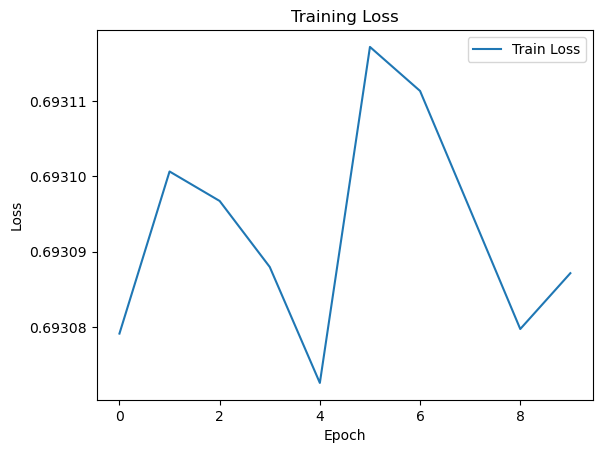

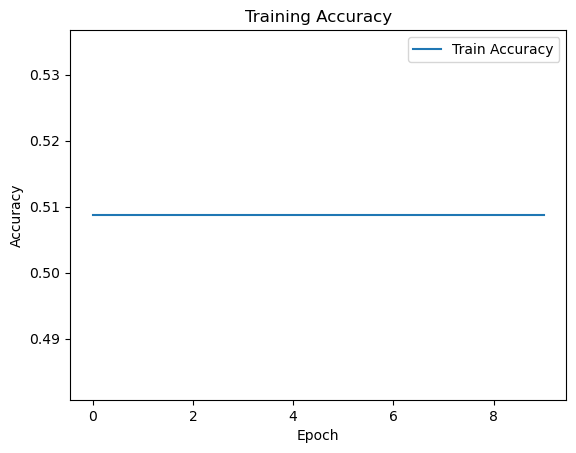

In [18]:
    
# Graficar métricas
plot_metrics(train_losses, train_accuracies)

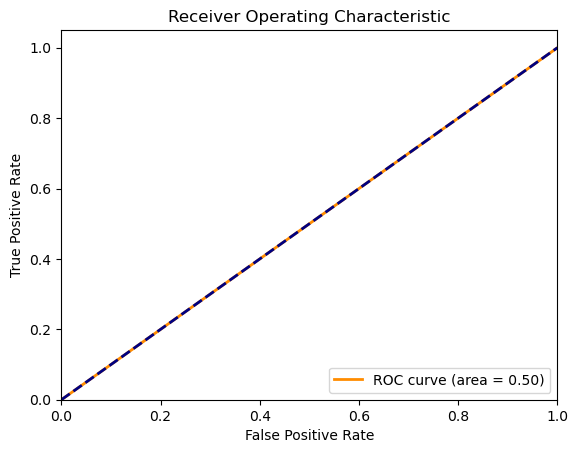

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00      3930
     Class 1       0.51      1.00      0.67      4070

    accuracy                           0.51      8000
   macro avg       0.25      0.50      0.34      8000
weighted avg       0.26      0.51      0.34      8000



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


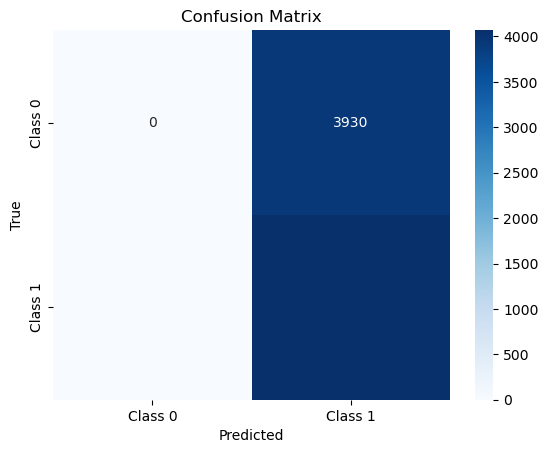

In [19]:
  # Graficar curva ROC
plot_roc_curve(all_labels, all_preds)
    
    # Imprimir reporte de clasificación
print_classification_report(all_labels, all_preds)